In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_stock_prices.csv to cleaned_stock_prices.csv


Baseline Regression Model Evaluation:
Mean Absolute Error (MAE): 1.7387
Root Mean Squared Error (RMSE): 2.2322


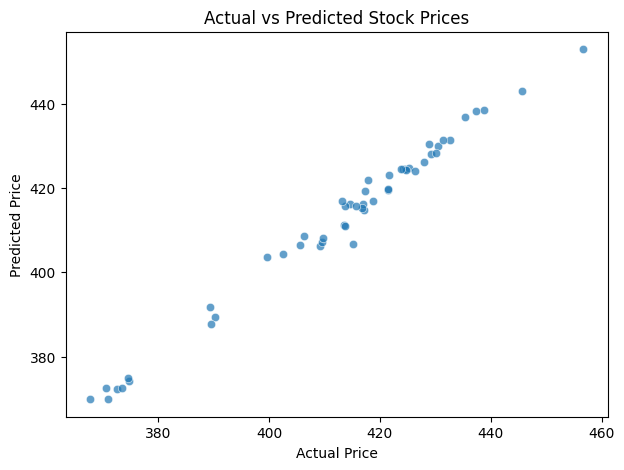

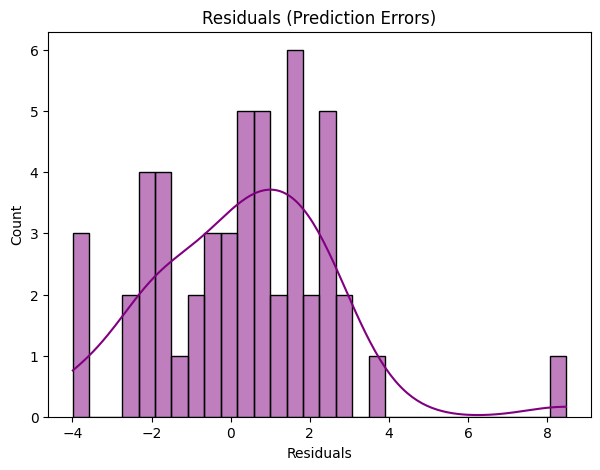

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("cleaned_stock_prices.csv")
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(',', '').str.replace('%', '')
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=['Price'])
drop_cols = ['Date', 'Vol.', 'Change %']
X = df.drop(columns=[col for col in drop_cols if col in df.columns] + ['Price'])
y = df['Price']
X = X.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Baseline Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Stock Prices")
plt.show()
plt.figure(figsize=(7,5))
sns.histplot(y_test - y_pred, bins=30, kde=True, color='purple')
plt.title("Residuals (Prediction Errors)")
plt.xlabel("Residuals")
plt.show()
